In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

path = "C:/Users/David/source/repos/EnergyProcessDataDAD/"
source = path + "EnergyDF_clean.h5"

# Read the entire dataset
df = pd.read_hdf(source)

In [8]:
sequence_lengths = df.groupby(["sample_nr", "label"])["label"].size().to_frame(name = "length").reset_index()
sequence_lengths.where((sequence_lengths["length"] > 1300) & (sequence_lengths["length"] < 1500)).dropna().index

Int64Index([   1,    6,    7,    8,    9,   10,   11,   16,   18,   20,
            ...
            3943, 3947, 3949, 3950, 3951, 3959, 3962, 3972, 3974, 3980],
           dtype='int64', length=1169)

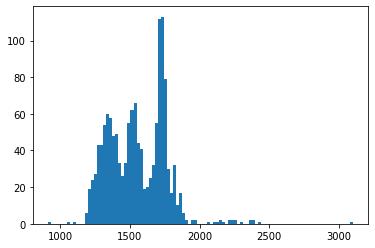

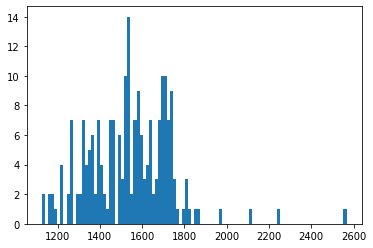

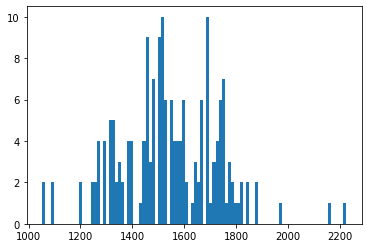

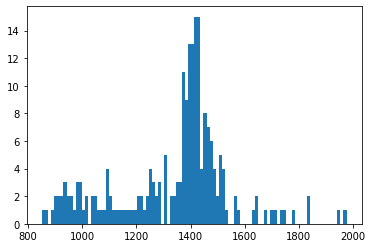

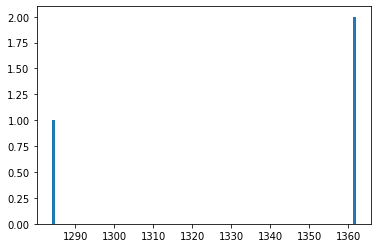

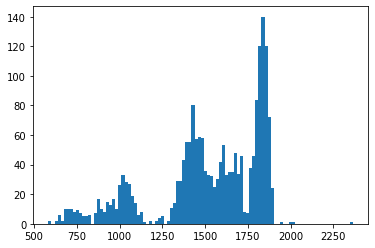

In [9]:
length_per_label = [sequence_lengths.where(sequence_lengths["label"] == i).dropna()["length"] for i in range(6)]

for series in length_per_label:
    plt.hist(series, bins = 100)
    plt.show()

In [16]:
def samples_within_range(df, min_length = 1300, max_length = 1500):
    """Returns a Index-Object with all the sample numbers of samples,
    which consist of at least min_length and at most max_length observations
    """
    
    lengths = df.groupby(["sample_nr"])["label"].size()
    lengths = lengths[(lengths > min_length) & (lengths < max_length)]
    return lengths.index

def average_curve(label = 0, columns=["output_double_register_25"]):
    
    min_length = 1300
    max_length = 1600
    num_columns = len(columns)
    
    selection_df = df[df["label"] == label]
    sample_numbers = samples_within_range(selection_df, min_length, max_length)
    selection_df = selection_df.loc[sample_numbers]
    
    values = np.zeros((len(sample_numbers), min_length))
    
    for i, (sample, sub_df) in enumerate(selection_df.groupby(level=0)):
             
        torque = sub_df[columns].to_numpy()
        #values[i, 0:min_length] = torque[0:min_length] 
        print(torque.shape)
        break
    
    mean_torque = values.mean(axis = 0)
    
    print(values.shape[0])
    plt.plot(mean_torque)
    #plt.show()
    
def average_curves(labels = [0,1,2,3], columns=["output_double_register_25"]):
    
    min_length = 1200
    max_length = 1700
    num_columns = len(columns)
    
    label_dict = {0: "normal", 
                  1: "damaged screw", 
                  2: "extra assembly component", 
                  3: "missing screw", 
                  4: "damaged plate thread",
                  5: "disassembly"}
    
    mean_data_by_label = dict()
    
    for label in labels:
        
        # Restrict the dataframe to samples, which are within the given range and match the label
        work_df = df[df["label"] == label]
        sample_numbers = samples_within_range(work_df, min_length, max_length)
        work_df = df.loc[sample_numbers]
        
        raw_data = np.zeros((len(sample_numbers), min_length, num_columns))     
        
        # Loop over all samples
        for idx, (sample_nr, sub_df) in enumerate(work_df.groupby(level=0)):
            
            raw_sample_data = np.abs(sub_df[columns].to_numpy()) # take the absolute value
            raw_data[idx, 0:min_length, :] = raw_sample_data[0:min_length, :]
        
        # Get a matrix of average curves
        mean_data = raw_data.mean(axis = 0)
        mean_data_by_label[label] = mean_data
        
    # plot every selected column of the datafram in a separate subplot    
    fig, axes = plt.subplots(nrows = num_columns, ncols = 1, figsize = (12, 4*num_columns))
    
    for subplot in range(len(columns)):
        
        axis = axes
        if num_columns != 1:           
            axis = axes[subplot]
        
        for label in labels:
            
            mean_data = mean_data_by_label[label]
            mean_column = mean_data[:, subplot]
            axis.plot(mean_column)
        
        axis.legend([label_dict[label] for label in labels])
        axis.title.set_text(columns[subplot])

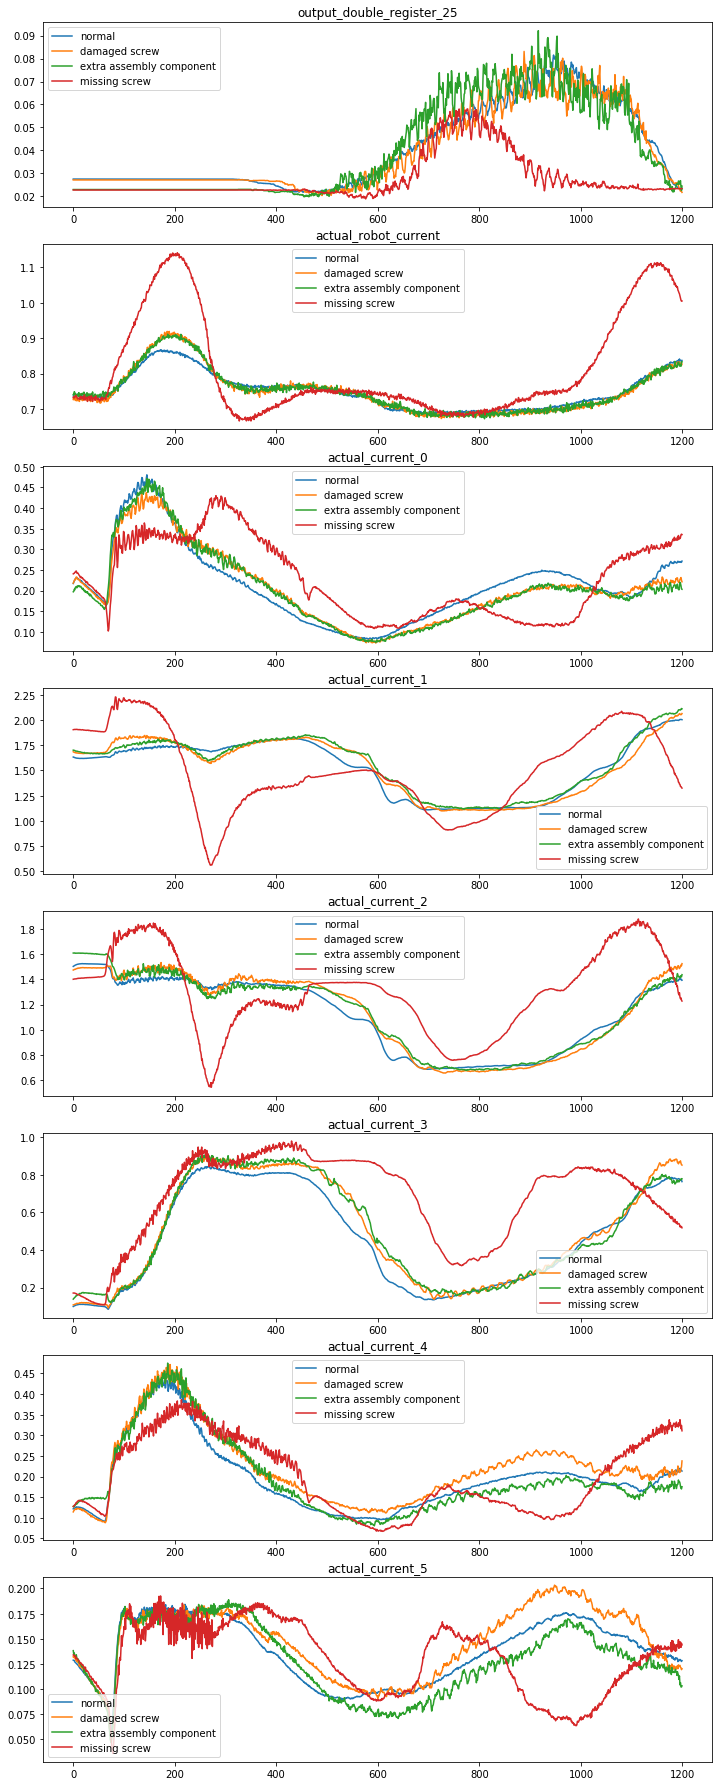

In [17]:
#average_curve(label = 0, columns = ["output_double_register_25", "actual_robot_current"])
#average_curve(label = 1)
#average_curve(label = 2)
#average_curve(label = 3)
joint_currents = [f'actual_current_{i}' for i in range(6)]
columns = ["output_double_register_25", "actual_robot_current"]
columns.extend(joint_currents)

average_curves(columns = columns)

In [45]:
import gc
gc.collect()

2290

array([2.5, 3.5, 4.5])

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])